In [2]:
import module_loader
import pandas as pd
from bookirds.curves import *
from bookirds.bsplines import BSpline
from bookirds.dual import Dual
import matplotlib.pyplot as plt

### Example 1

The demonstration of the mixed interpolator.

In [3]:
nodes = {
    datetime(2022, 1, 1): 1.00,
    datetime(2023, 1, 1): 1.00,
    datetime(2024, 1, 1): 1.00,
    datetime(2025, 1, 1): 1.00,
}
nodes_dual = {k: Dual(v, {f"v{i}": 1}) for i, (k,v) in enumerate(nodes.items())}
swaps = {
    Swap(datetime(2022, 1, 1), 12*1, 3, 3): 1.0,
    Swap(datetime(2022, 1, 1), 12*2, 3, 3): 1.5,
    Swap(datetime(2022, 1, 1), 12*3, 3, 3): 2.0,
}
t = [
    datetime(2023, 1, 1), datetime(2023, 1, 1), datetime(2023, 1, 1), datetime(2023, 1, 1),
    datetime(2024, 1, 1),
    datetime(2025, 1, 1), datetime(2025, 1, 1), datetime(2025, 1, 1), datetime(2025, 1, 1),
]
s_cv = SolvedCurve(
    nodes=nodes_dual, interpolation="log_linear", 
    swaps=list(swaps.keys()), obj_rates=list(swaps.values()),
    algorithm="levenberg_marquardt"
)
adv_cv = AdvancedCurve(
    nodes=nodes_dual, interpolation="log_linear", 
    swaps=list(swaps.keys()), obj_rates=list(swaps.values()),
    t=t, algorithm="levenberg_marquardt"
)
print(s_cv.iterate())
print(adv_cv.iterate())

tolerance reached (levenberg_marquardt) after 7 iterations, func: 1.0023326866248087e-18
basic solve:  tolerance reached (levenberg_marquardt) after 7 iterations, func: 1.0023326866248087e-18
tolerance reached (gauss_newton) after 2 iterations, func: 7.811378041170977e-24


In [4]:
swaps = [Swap(datetime(2022, 1, 1),days=True,tenor=int(i),period_fix=12,period_float=12)
         for i in np.arange(1,365*3,dtype=int)]

In [5]:
for swap in swaps:
    print(swap.rate(s_cv).real,swap.rate(adv_cv).real)

0.9987656703726225 0.9987656703726225
0.9987793357850173 0.9987793357850173
0.9987930006746203 0.9987930006746203
0.9988066661995177 0.9988066661995177
0.9988203316656343 0.9988203316656343
0.9988339976117268 0.9988339976117268
0.9988476636097257 0.9988476636097257
0.998861330021726 0.998861330021726
0.9988749965363071 0.9988749965363071
0.9988886634287868 0.9988886634287868
0.9989023304534599 0.9989023304534599
0.9989159978327207 0.9989159978327207
0.9989044344739622 0.9989044344739622
0.9988964755987422 0.9988964755987422
0.9988914000166873 0.9988914000166873
0.9988886671682409 0.9988886671682409
0.9988878634419541 0.9988878634419541
0.9988886674175851 0.9988886674175851
0.9988908251118067 0.9988908251118067
0.9988941335804855 0.9988941335225009
0.9988984283213079 0.9988984283213079
0.9989035749580466 0.9989035749055125
0.998909462286565 0.998909462286565
0.9989159977845927 0.9989159977845927
0.9989099858400592 0.9989099858400592
0.9989054874471619 0.9989054874471619
0.99890233447340

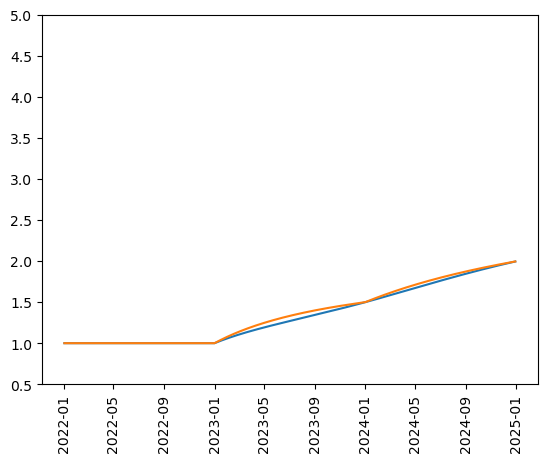

In [6]:
fig, ax = plt.subplots()

x = [datetime(2022,1,1) + i * timedelta(days=1) for i in np.arange(1,365*3,dtype=int)]
ax.set_ylim(0.5, 5)

y = [swap.rate(s_cv).real for swap in swaps]
z = [swap.rate(adv_cv).real for swap in swaps]
ax.plot(x, z)
ax.plot(x, y)
plt.xticks(rotation=90)
plt.show()

### Example 2

A layered curveset with inherited rates yields the same curve.

In [7]:
nodes = {
    datetime(2022, 1, 1): 1.00,
    datetime(2023, 1, 1): 1.00,
    datetime(2024, 1, 1): 1.00,
    datetime(2025, 1, 1): 1.00,
    datetime(2027, 1, 1): 1.00,
    datetime(2029, 1, 1): 1.00,
    datetime(2032, 1, 1): 1.00,
}
nodes_dual = {k: Dual(v, {f"v{i}": 1}) for i, (k,v) in enumerate(nodes.items())}
swaps = {
    Swap(datetime(2022, 1, 1), 12*1, 3, 3): 1.0,
    Swap(datetime(2022, 1, 1), 12*2, 3, 3): 1.4,
    Swap(datetime(2022, 1, 1), 12*3, 3, 3): 1.64,
    Swap(datetime(2022, 1, 1), 12*5, 3, 3): 1.84,
    Swap(datetime(2022, 1, 1), 12*7, 3, 3): 1.90,
    Swap(datetime(2022, 1, 1), 12*10, 3, 3): 1.97,
}
t = [
    datetime(2022, 1, 1), datetime(2022, 1, 1), datetime(2022, 1, 1), datetime(2022, 1, 1),
    datetime(2023, 1, 1),
    datetime(2024, 1, 1),
    datetime(2025, 1, 1),
    datetime(2027, 1, 1),
    datetime(2029, 1, 1),
    datetime(2032, 1, 1), datetime(2032, 1, 1), datetime(2032, 1, 1), datetime(2032, 1, 1),
]
adv_cv = AdvancedCurve(
    nodes=nodes_dual, interpolation="log_linear", 
    swaps=list(swaps.keys()), obj_rates=list(swaps.values()),
    t=t, algorithm="levenberg_marquardt"
)
print(adv_cv.iterate())

basic solve:  tolerance reached (levenberg_marquardt) after 9 iterations, func: 9.786030331398608e-15
tolerance reached (gauss_newton) after 2 iterations, func: 9.466330862652142e-30


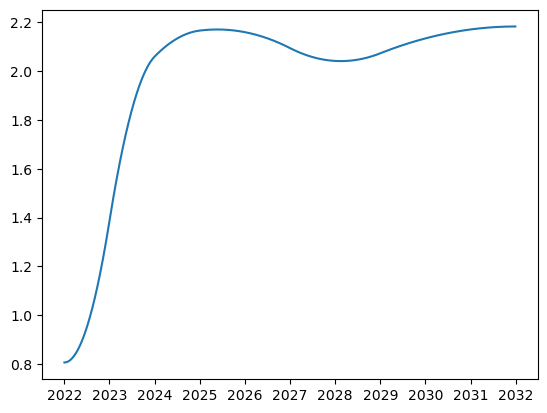

In [8]:
fig, ax = plt.subplots()
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*10)]
y = [adv_cv.rate(date, days=1).real for date in x]
ax.plot(x, y)
plt.show()

Now add some additional instruments and skew them derived from the first layer

In [9]:
nodes = {
    datetime(2022, 1, 1): 1.00,
    datetime(2023, 1, 1): 1.00,
    datetime(2024, 1, 1): 1.00,
    datetime(2025, 1, 1): 1.00,
    datetime(2026, 1, 1): 1.00,
    datetime(2027, 1, 1): 1.00,
    datetime(2028, 1, 1): 1.00,
    datetime(2029, 1, 1): 1.00,
    datetime(2030, 1, 1): 1.00,
    datetime(2031, 1, 1): 1.00,
    datetime(2032, 1, 1): 1.00,
}
nodes_dual = {k: Dual(v, {f"v{i}": 1}) for i, (k,v) in enumerate(nodes.items())}
swaps = {
    Swap(datetime(2022, 1, 1), 12*1, 3, 3): 0,
    Swap(datetime(2022, 1, 1), 12*2, 3, 3): 0,
    Swap(datetime(2022, 1, 1), 12*3, 3, 3): 0,
    Swap(datetime(2022, 1, 1), 12*4, 3, 3): 0,
    Swap(datetime(2022, 1, 1), 12*5, 3, 3): 0,
    Swap(datetime(2022, 1, 1), 12*6, 3, 3): 0,
    Swap(datetime(2022, 1, 1), 12*7, 3, 3): 0,
    Swap(datetime(2022, 1, 1), 12*8, 3, 3): 0,
    Swap(datetime(2022, 1, 1), 12*9, 3, 3): 0,
    Swap(datetime(2022, 1, 1), 12*10, 3, 3): 0,
}
skews = {4: 0.001, 6: 0.001, 8: 0.002, 9:0.0025}
for i, swap in enumerate(swaps.keys()):
    bump = 0 if (i+1) not in skews.keys() else skews[i+1]
    swaps[swap] = swap.rate(adv_cv).real + bump

t = [
    datetime(2022, 1, 1), datetime(2022, 1, 1), datetime(2022, 1, 1), datetime(2022, 1, 1),
    datetime(2023, 1, 1),
    datetime(2024, 1, 1),
    datetime(2025, 1, 1),
    datetime(2026, 1, 1),
    datetime(2027, 1, 1),
    datetime(2028, 1, 1),
    datetime(2029, 1, 1),
    datetime(2030, 1, 1),
    datetime(2031, 1, 1),
    datetime(2032, 1, 1), datetime(2032, 1, 1), datetime(2032, 1, 1), datetime(2032, 1, 1),
]
adv_cv2 = AdvancedCurve(
    nodes=nodes_dual, interpolation="log_linear", 
    swaps=list(swaps.keys()), obj_rates=list(swaps.values()),
    t=t, algorithm="levenberg_marquardt"
)
print(adv_cv2.iterate())

basic solve:  tolerance reached (levenberg_marquardt) after 9 iterations, func: 1.3776962616019794e-14
tolerance reached (gauss_newton) after 2 iterations, func: 4.1070070878068927e-29


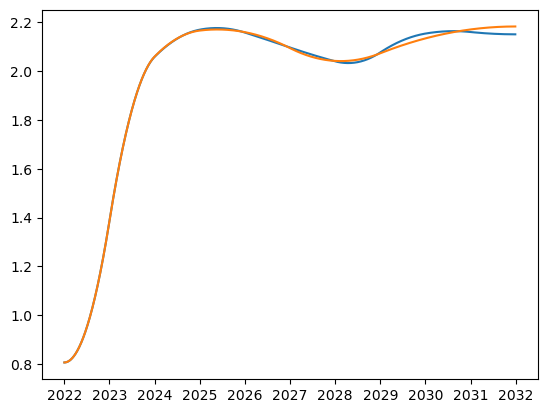

In [10]:
fig, ax = plt.subplots()
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*10)]
#ax.set_ylim(1.8, 2.5)
y = [adv_cv.rate(date, days=1).real for date in x]
z = [adv_cv2.rate(date, days=1).real for date in x]
ax.plot(x, np.array(z))
ax.plot(x, np.array(y))
plt.show()

In [11]:
df_first_layer_risk = pd.DataFrame([], index=["1y", "2y", "3y", "5y", "7y", "10y"], columns=[1,2,3,4,5,6,7,8,9,10])
for i, swap in enumerate(swaps):
    df_first_layer_risk[i+1] = swap.risk(adv_cv)
df_first_layer_risk.style.format("{:,.2f}")

fwd tolerance reached (gauss_newton) after 2 iterations, func: 4.2401273655629385e-29
bck tolerance reached (gauss_newton) after 2 iterations, func: 6.800227522038003e-29
fwd tolerance reached (gauss_newton) after 2 iterations, func: 9.811457508686334e-30
bck tolerance reached (gauss_newton) after 2 iterations, func: 6.619036032870052e-30
fwd tolerance reached (gauss_newton) after 2 iterations, func: 1.450764508508017e-29
bck tolerance reached (gauss_newton) after 2 iterations, func: 1.326272396902826e-29
fwd tolerance reached (gauss_newton) after 2 iterations, func: 2.902638352664001e-28
bck tolerance reached (gauss_newton) after 2 iterations, func: 2.55147199032421e-28
fwd tolerance reached (gauss_newton) after 2 iterations, func: 1.073960166748543e-28
bck tolerance reached (gauss_newton) after 2 iterations, func: 1.3030996078119589e-28
fwd tolerance reached (gauss_newton) after 2 iterations, func: 6.702482725500462e-28
bck tolerance reached (gauss_newton) after 2 iterations, func: 7

,1,2,3,4,5,6,7,8,9,10
1y,99.42,0.00,0.00,8.03,0.00,-2.23,0.00,1.20,0.95,0.00
2y,0.00,197.37,0.00,-64.59,0.00,17.90,0.00,-9.62,-7.58,0.00
3y,-0.00,0.00,293.59,231.83,-0.00,-54.28,0.00,29.19,23.02,0.00
5y,0.00,-0.00,0.00,267.78,479.41,305.64,-0.00,-132.48,-104.44,0.00
7y,-0.00,0.00,-0.00,-64.98,0.00,339.53,657.84,653.69,387.80,-0.00
10y,0.00,-0.00,0.00,9.42,-0.00,-37.16,0.00,202.25,529.03,911.46


In [12]:
df_second_layer_risk = pd.DataFrame([], index=["1y", "2y", "3y", "4y", "5y", "6y", "7y", "8y", "9y", "10y"], columns=[1,2,3,4,5,6,7,8,9,10])
for i, swap in enumerate(swaps):
    df_second_layer_risk[i+1] = swap.risk(adv_cv2)
df_second_layer_risk.style.format("{:,.2f}")

fwd tolerance reached (gauss_newton) after 2 iterations, func: 7.015931675809374e-29
bck tolerance reached (gauss_newton) after 2 iterations, func: 3.5104310282335025e-29
fwd tolerance reached (gauss_newton) after 2 iterations, func: 1.582652191099655e-29
bck tolerance reached (gauss_newton) after 2 iterations, func: 2.238392818564621e-29
fwd tolerance reached (gauss_newton) after 2 iterations, func: 1.2572470676959876e-29
bck tolerance reached (gauss_newton) after 2 iterations, func: 1.400228106767296e-29
fwd tolerance reached (gauss_newton) after 2 iterations, func: 1.3016204936146695e-29
bck tolerance reached (gauss_newton) after 2 iterations, func: 2.01159530831358e-29
fwd tolerance reached (gauss_newton) after 2 iterations, func: 3.1603740015416785e-29
bck tolerance reached (gauss_newton) after 2 iterations, func: 4.3202460512494475e-29
fwd tolerance reached (gauss_newton) after 2 iterations, func: 4.920519896316061e-29
bck tolerance reached (gauss_newton) after 2 iterations, func

,1,2,3,4,5,6,7,8,9,10
1y,99.42,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
2y,0.00,197.37,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
3y,-0.00,0.00,293.59,-0.00,0.00,-0.00,0.00,-0.01,-0.01,0.00
4y,0.00,-0.00,0.00,387.49,-0.00,-0.00,0.00,-0.01,-0.01,0.00
5y,-0.00,0.00,-0.00,0.00,479.40,-0.00,0.00,-0.01,-0.01,0.00
6y,0.00,-0.00,0.00,-0.00,0.00,569.41,-0.00,-0.01,-0.01,-0.00
7y,-0.00,0.00,-0.00,0.00,-0.00,0.00,657.83,-0.01,-0.02,-0.00
8y,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,744.18,-0.02,0.00
9y,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,828.69,-0.00
10y,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,911.41


### Example 3

Here, after construction we insert a turn which is a either one new swap and one new node (if the turn is exactly before or after an existing node) or two new swaps and two new nodes. *Turns implemented in this way do not work with log-cubic interpolation*.

In [17]:
nodes = {
    datetime(2022, 1, 1): 1.00,
    datetime(2022, 12, 31): 1.00,
    datetime(2023, 1, 1): 1.00,
    datetime(2023, 6, 30): 1.00,
    datetime(2023, 7, 1): 1.00,
    datetime(2024, 1, 1): 1.00,
    datetime(2025, 1, 1): 1.00,
}
nodes_dual = {k: Dual(v, {f"v{i}": 1}) for i, (k,v) in enumerate(nodes.items())}
swaps = {
    Swap(datetime(2022, 1, 1), 12*1, 3, 3): 1.0,
    Swap(datetime(2022, 1, 1), 12*2, 3, 3): 1.5,
    Swap(datetime(2022, 1, 1), 12*3, 3, 3): 2.0,
    SwapSpread(
        Swap(datetime(2022, 12, 30), 1, 1, 1, days=True),
        Swap(datetime(2022, 12, 31), 1, 1, 1, days=True)
    ): -0.25,
    SwapSpread(
        Swap(datetime(2023, 6, 29), 1, 1, 1, days=True),
        Swap(datetime(2023, 6, 30), 1, 1, 1, days=True)
    ): -0.25,
    SwapSpread(
        Swap(datetime(2023, 6, 30), 1, 1, 1, days=True),
        Swap(datetime(2023, 7, 1), 1, 1, 1, days=True)
    ): 0.25,
}
s_cv = SolvedCurve(
    nodes=nodes_dual, interpolation="log_linear", 
    swaps=list(swaps.keys()), obj_rates=list(swaps.values()),
    algorithm="levenberg_marquardt"
)
print(s_cv.iterate())

tolerance reached (levenberg_marquardt) after 7 iterations, func: 1.305794342813062e-14


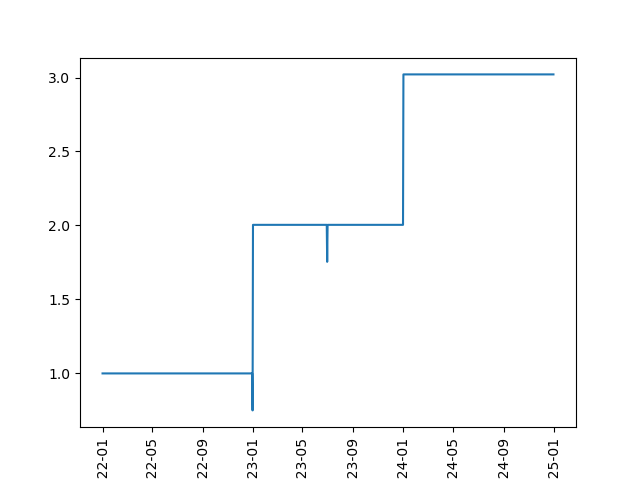

In [20]:
fig, ax = plt.subplots()
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*3)]
y = [s_cv.rate(date, days=1).real for date in x]
z = [s_cv.rate(date, days=91).real for date in x]
ax.plot(x, y)
# ax.plot(x, z)
# ax.set_xlim(datetime(2023,1,1),datetime(2023,9,30))
# ax.set_ylim(1.95,2.05)
plt.xticks(rotation=90)
plt.show()

In [21]:
(pd.DataFrame(index=x,data=y,columns=['1D Forward SOFR O/N'])).to_clipboard()

### Example 5

We demonstrate the effects of keeping constant knot points and node points for the cubic spline as opposed to daily variation aligning with par tenor rates.

First the static curve constructed with IMM nodes and IMM knots.

In [13]:
nodes = {
    datetime(2022, 1, 1): 1.00,
    datetime(2023, 3, 15): 1.00,
    datetime(2024, 3, 15): 1.00,
    datetime(2025, 3, 15): 1.00,
    datetime(2026, 3, 15): 1.00,
    datetime(2027, 3, 15): 1.00,
    datetime(2028, 3, 15): 1.00,
    datetime(2029, 3, 15): 1.00,
    datetime(2030, 3, 15): 1.00,
    datetime(2031, 3, 15): 1.00,
    datetime(2032, 3, 15): 1.00,
}
nodes_dual = {k: Dual(v, {f"v{i}": 1}) for i, (k,v) in enumerate(nodes.items())}
swaps = {
    Swap(datetime(2022, 1, 1), 12*1, 3, 3): 1.00,
    Swap(datetime(2022, 1, 1), 12*2, 3, 3): 1.04,
    Swap(datetime(2022, 1, 1), 12*3, 3, 3): 1.09,
    Swap(datetime(2022, 1, 1), 12*4, 3, 3): 1.12,
    Swap(datetime(2022, 1, 1), 12*5, 3, 3): 1.127,
    Swap(datetime(2022, 1, 1), 12*6, 3, 3): 1.13,
    Swap(datetime(2022, 1, 1), 12*7, 3, 3): 1.132,
    Swap(datetime(2022, 1, 1), 12*8, 3, 3): 1.13,
    Swap(datetime(2022, 1, 1), 12*9, 3, 3): 1.127,
    Swap(datetime(2022, 1, 1), 12*10, 3, 3): 1.123,
}

t = [
    datetime(2023, 3, 15), datetime(2023, 3, 15), datetime(2023, 3, 15), datetime(2023, 3, 15),
    datetime(2024, 3, 15), 
    datetime(2025, 3, 15),
    datetime(2026, 3, 15),
    datetime(2027, 3, 15),
    datetime(2028, 3, 15),
    datetime(2029, 3, 15),
    datetime(2030, 3, 15),
    datetime(2031, 3, 15),
    datetime(2032, 3, 15), datetime(2032, 3, 15), datetime(2032, 3, 15), datetime(2032, 3, 15),
]
adv_cv2 = AdvancedCurve(
    nodes=nodes_dual, interpolation="log_linear", 
    swaps=list(swaps.keys()), obj_rates=list(swaps.values()),
    t=t, algorithm="levenberg_marquardt"
)
print(adv_cv2.iterate())

basic solve:  tolerance reached (levenberg_marquardt) after 10 iterations, func: 6.843722916641918e-16
tolerance reached (gauss_newton) after 2 iterations, func: 1.4196775216893266e-24


Now we collect swap rate data for further dates **assuming** rates evolve **exactly** as predicted. These will be used to perform the experiment to analyse the effect of changing nodes and knots. We acquire swap data for the 1st Jan 2022, and the subsequent 70 days.

In [14]:
df = pd.DataFrame([], index=[datetime(2022, 1, 1)+ timedelta(days=i) for i in range(73)],
                  columns=[12*1, 12*2, 12*3, 12*4, 12*5, 12*6, 12*7, 12*8, 12*9, 12*10])
for date in df.index:
    for tenor in df.columns:
        df.loc[date, tenor] = Swap(date, tenor, 3, 3).rate(adv_cv2).real
        
df

,12,24,36,48,60,72,84,96,108,120
2022-01-01,1.0,1.04,1.09,1.12,1.127,1.13,1.132,1.13,1.127,1.123
2022-01-02,1.0,1.040182,1.090206,1.120129,1.127078,1.13007,1.132054,1.130038,1.127032,1.123024
2022-01-03,1.0,1.040364,1.090411,1.120257,1.127156,1.13014,1.132108,1.130076,1.127063,1.123048
2022-01-04,1.0,1.040547,1.090617,1.120385,1.127234,1.13021,1.132162,1.130114,1.127095,1.123072
2022-01-05,1.0,1.04073,1.090822,1.120513,1.127312,1.13028,1.132216,1.130152,1.127126,1.123095
...,...,...,...,...,...,...,...,...,...,...
2022-03-10,1.0,1.053621,1.103982,1.128437,1.13233,1.134772,1.13558,1.13258,1.129107,1.124605
2022-03-11,1.0,1.053838,1.104187,1.128556,1.132409,1.134842,1.135631,1.132618,1.129137,1.124629
2022-03-12,1.0,1.054055,1.104391,1.128675,1.132488,1.134912,1.135682,1.132656,1.129167,1.124653
2022-03-13,1.0,1.054273,1.104596,1.128794,1.132567,1.134982,1.135733,1.132694,1.129198,1.124677


Now we will build curves for each of the 70 days using the forecast rates predicted by the above curve.
 
  - Nodes will align with the per tenor end rates.
  - Knots for the log-cubic spline begin in 1 year and extend to the 10 year tenor.

In [15]:
def add_years(date: datetime, years: int) -> datetime:
    return date.replace(day=date.day, month=date.month, year=date.year+years)

test_swaps = [
    Swap(datetime(2026,4,15), 6, 6, 6),
    Swap(datetime(2027,8,15), 6, 6, 6),
    Swap(datetime(2028,2,15), 6, 6, 6),
    Swap(datetime(2029,6,15), 6, 6, 6),
    Swap(datetime(2030,7,15), 6, 6, 6),
]
test_df = pd.DataFrame([], index=df.index, columns=[0,1,2,3,4]) 

for date in df.index:
    nodes = {add_years(date, i): 1.00 for i in range(len(df.columns)+1)}
    nodes_dual = {k: Dual(v, {f"v{i}": 1}) for i, (k,v) in enumerate(nodes.items())}
    swaps = {Swap(date, tenor, 3, 3): df.loc[date, tenor] for tenor in df.columns}
    t = [add_years(date, 1), add_years(date, 1), add_years(date, 1)]
    t += [add_years(date, i+1) for i in range(len(df.columns))]
    t += [add_years(date, 10), add_years(date, 10), add_years(date, 10)]
    adv_cv2 = AdvancedCurve(
        nodes=nodes_dual, interpolation="log_linear", 
        swaps=list(swaps.keys()), obj_rates=list(swaps.values()),
        t=t, algorithm="gauss_newton"
    )
    print(date, adv_cv2.iterate())
    for col, swap in enumerate(test_swaps):
        test_df.loc[date, col] = swap.rate(adv_cv2).real

test_df

basic solve:  tolerance reached (gauss_newton) after 4 iterations, func: 3.4216841763961387e-29
2022-01-01 00:00:00 tolerance reached (gauss_newton) after 2 iterations, func: 3.194886666145098e-29
basic solve:  tolerance reached (gauss_newton) after 4 iterations, func: 9.515634669228455e-30
2022-01-02 00:00:00 tolerance reached (gauss_newton) after 2 iterations, func: 6.015064402310215e-30
basic solve:  tolerance reached (gauss_newton) after 4 iterations, func: 2.894133446029587e-29
2022-01-03 00:00:00 tolerance reached (gauss_newton) after 2 iterations, func: 2.8398992587956425e-29
basic solve:  tolerance reached (gauss_newton) after 4 iterations, func: 3.2109104032823996e-29
2022-01-04 00:00:00 tolerance reached (gauss_newton) after 2 iterations, func: 3.58561933326238e-29
basic solve:  tolerance reached (gauss_newton) after 4 iterations, func: 1.3718784179859158e-29
2022-01-05 00:00:00 tolerance reached (gauss_newton) after 2 iterations, func: 1.357087276013022e-29
basic solve:  tol

,0,1,2,3,4
2022-01-01,1.153127,1.149768,1.149681,1.111537,1.099077
2022-01-02,1.153101,1.14978,1.149675,1.111507,1.099113
2022-01-03,1.153076,1.149792,1.14967,1.111478,1.099148
2022-01-04,1.153051,1.149804,1.149664,1.111448,1.099184
2022-01-05,1.153026,1.149817,1.149658,1.111419,1.099219
...,...,...,...,...,...
2022-03-10,1.152664,1.150892,1.149178,1.110312,1.100838
2022-03-11,1.15268,1.150908,1.14917,1.11031,1.100849
2022-03-12,1.152697,1.150925,1.149162,1.110309,1.100859
2022-03-13,1.152714,1.150941,1.149155,1.110308,1.100869


<AxesSubplot:>

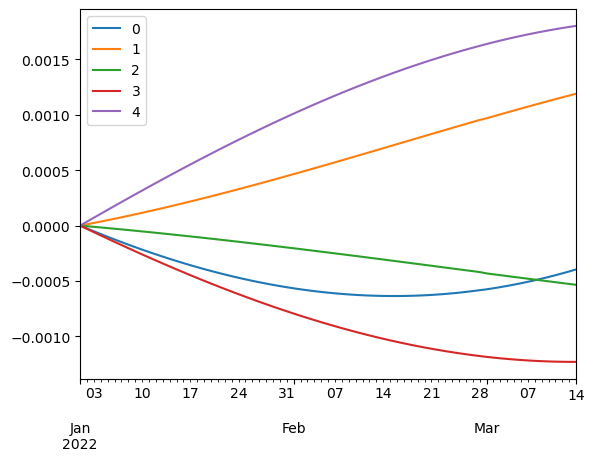

In [16]:
initial = test_df.iloc[0, :].copy()
for col in test_df:
    test_df.loc[:, col] -= test_df.loc[test_df.index[0], col]
test_df.plot()

The following is included as a numerical demonstration of the mathematical fact that using consistent knots and consistent data for differenet datasites the spline is identical and the test swaps, as with all other swaps maintain their values throughout the period.

In [17]:
nodes = {
    datetime(2023, 3, 15): 1.00,
    datetime(2024, 3, 15): 1.00,
    datetime(2025, 3, 15): 1.00,
    datetime(2026, 3, 15): 1.00,
    datetime(2027, 3, 15): 1.00,
    datetime(2028, 3, 15): 1.00,
    datetime(2029, 3, 15): 1.00,
    datetime(2030, 3, 15): 1.00,
    datetime(2031, 3, 15): 1.00,
    datetime(2032, 3, 15): 1.00,
}
nodes_dual = {k: Dual(v, {f"v{i+1}": 1}) for i, (k,v) in enumerate(nodes.items())}
t = [
    datetime(2023, 3, 15), datetime(2023, 3, 15), datetime(2023, 3, 15), datetime(2023, 3, 15),
    datetime(2024, 3, 15), 
    datetime(2025, 3, 15),
    datetime(2026, 3, 15),
    datetime(2027, 3, 15),
    datetime(2028, 3, 15),
    datetime(2029, 3, 15),
    datetime(2030, 3, 15),
    datetime(2031, 3, 15),
    datetime(2032, 3, 15), datetime(2032, 3, 15), datetime(2032, 3, 15), datetime(2032, 3, 15),
]

test_df_static = pd.DataFrame([], index=df.index, columns=[0,1,2,3,4]) 

for date in df.index:
    swaps = {Swap(date, tenor, 3, 3): df.loc[date, tenor] for tenor in df.columns}
    nodes_ = {date: Dual(1.0, {"v0": 1}), **nodes_dual}
    adv_cv2 = AdvancedCurve(
        nodes=nodes_, interpolation="log_linear", 
        swaps=list(swaps.keys()), obj_rates=list(swaps.values()),
        t=t, algorithm="gauss_newton"
    )
    print(date, adv_cv2.iterate())
    for col, swap in enumerate(test_swaps):
        test_df_static.loc[date, col] = swap.rate(adv_cv2).real

test_df_static

basic solve:  tolerance reached (gauss_newton) after 4 iterations, func: 1.3934016003163528e-24
2022-01-01 00:00:00 tolerance reached (gauss_newton) after 2 iterations, func: 8.15484960772221e-29
basic solve:  tolerance reached (gauss_newton) after 4 iterations, func: 4.619951565475212e-25
2022-01-02 00:00:00 tolerance reached (gauss_newton) after 2 iterations, func: 3.6928551125658615e-29
basic solve:  tolerance reached (gauss_newton) after 4 iterations, func: 1.0377938524725543e-24
2022-01-03 00:00:00 tolerance reached (gauss_newton) after 2 iterations, func: 6.276374577164675e-29
basic solve:  tolerance reached (gauss_newton) after 4 iterations, func: 1.8971347094317772e-24
2022-01-04 00:00:00 tolerance reached (gauss_newton) after 2 iterations, func: 3.432777532875809e-29
basic solve:  tolerance reached (gauss_newton) after 4 iterations, func: 4.827263841588744e-25
2022-01-05 00:00:00 tolerance reached (gauss_newton) after 2 iterations, func: 1.3324353727248653e-29
basic solve:  to

,0,1,2,3,4
2022-01-01,1.152751,1.150973,1.149139,1.110308,1.100887
2022-01-02,1.152751,1.150973,1.149139,1.110308,1.100887
2022-01-03,1.152751,1.150973,1.149139,1.110308,1.100887
2022-01-04,1.152751,1.150973,1.149139,1.110308,1.100887
2022-01-05,1.152751,1.150973,1.149139,1.110308,1.100887
...,...,...,...,...,...
2022-03-10,1.152751,1.150973,1.149139,1.110308,1.100887
2022-03-11,1.152751,1.150973,1.149139,1.110308,1.100887
2022-03-12,1.152751,1.150973,1.149139,1.110308,1.100887
2022-03-13,1.152751,1.150973,1.149139,1.110308,1.100887


### Example 6

Finally let's suppose that an IMM roll has taken place, so that the knot points shift significantly but not the datasites.

basic solve:  tolerance reached (gauss_newton) after 4 iterations, func: 3.957944917232462e-25
tolerance reached (gauss_newton) after 2 iterations, func: 9.042318126095848e-29
basic solve:  tolerance reached (gauss_newton) after 4 iterations, func: 1.8131797315334202e-24
tolerance reached (gauss_newton) after 2 iterations, func: 5.229161725483782e-28


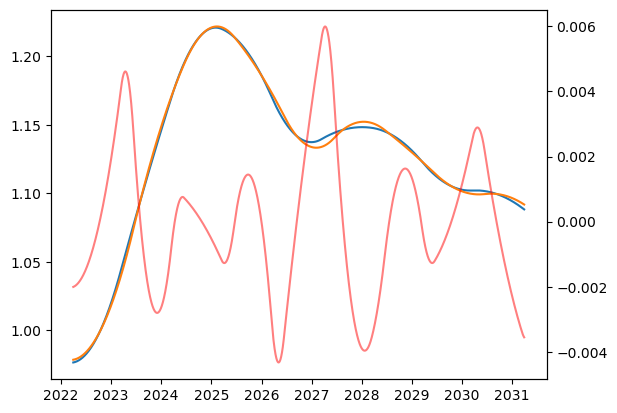

In [18]:
mar_imm_nodes = {
    datetime(2022, 3, 14): 1.00,
    datetime(2023, 3, 15): 1.00,
    datetime(2024, 3, 15): 1.00,
    datetime(2025, 3, 15): 1.00,
    datetime(2026, 3, 15): 1.00,
    datetime(2027, 3, 15): 1.00,
    datetime(2028, 3, 15): 1.00,
    datetime(2029, 3, 15): 1.00,
    datetime(2030, 3, 15): 1.00,
    datetime(2031, 3, 15): 1.00,
    datetime(2032, 3, 15): 1.00,
}
mar_imm_nodes_dual = {k: Dual(v, {f"v{i}": 1}) for i, (k,v) in enumerate(mar_imm_nodes.items())}

jun_imm_nodes = {
    datetime(2022, 3, 14): 1.00,
    datetime(2023, 6, 15): 1.00,
    datetime(2024, 6, 15): 1.00,
    datetime(2025, 6, 15): 1.00,
    datetime(2026, 6, 15): 1.00,
    datetime(2027, 6, 15): 1.00,
    datetime(2028, 6, 15): 1.00,
    datetime(2029, 6, 15): 1.00,
    datetime(2030, 6, 15): 1.00,
    datetime(2031, 6, 15): 1.00,
    datetime(2032, 6, 15): 1.00,
}
jun_imm_nodes_dual = {k: Dual(v, {f"v{i}": 1}) for i, (k,v) in enumerate(jun_imm_nodes.items())}

t_mar = [
    datetime(2022, 3, 14), datetime(2022, 3, 14), datetime(2022, 3, 14), datetime(2022, 3, 14),
    datetime(2023, 3, 15),
    datetime(2024, 3, 15),
    datetime(2025, 3, 15),
    datetime(2026, 3, 15),
    datetime(2027, 3, 15),
    datetime(2028, 3, 15),
    datetime(2029, 3, 15),
    datetime(2030, 3, 15),
    datetime(2031, 3, 15),
    datetime(2032, 3, 15), datetime(2032, 3, 15), datetime(2032, 3, 15), datetime(2032, 3, 15),
]

t_jun = [
    datetime(2022, 3, 14), datetime(2022, 3, 14), datetime(2022, 3, 14), datetime(2022, 3, 14),
    datetime(2023, 6, 15),
    datetime(2024, 6, 15),
    datetime(2025, 6, 15),
    datetime(2026, 6, 15),
    datetime(2027, 6, 15),
    datetime(2028, 6, 15),
    datetime(2029, 6, 15),
    datetime(2030, 6, 15),
    datetime(2031, 6, 15),
    datetime(2032, 6, 15), datetime(2032, 6, 15), datetime(2032, 6, 15), datetime(2032, 6, 15),
]

date = datetime(2022, 3, 14)
swaps = {Swap(date, tenor, 3, 3): df.loc[date, tenor] for tenor in df.columns}
adv_cv_mar = AdvancedCurve(
        nodes=mar_imm_nodes_dual, interpolation="log_linear", 
        swaps=list(swaps.keys()), obj_rates=list(swaps.values()),
        t=t_mar, algorithm="gauss_newton"
    )
adv_cv_jun = AdvancedCurve(
        nodes=jun_imm_nodes_dual, interpolation="log_linear", 
        swaps=list(swaps.keys()), obj_rates=list(swaps.values()),
        t=t_jun, algorithm="gauss_newton"
    )

print(adv_cv_mar.iterate())
print(adv_cv_jun.iterate())

fig, ax = plt.subplots()
ax2 = ax.twinx()
x = [datetime(2022,4,1) + i * timedelta(days=1) for i in range(365*9)]
y = [adv_cv_mar.rate(date, days=1).real for date in x]
z = [adv_cv_jun.rate(date, days=1).real for date in x]
ax.plot(x, y)
ax.plot(x, z)
ax2.plot(x, np.array(y)-np.array(z), c=(1,0,0,0.5))
plt.xticks(rotation=90)
plt.show()

# A practical curveset

## Initial exploration

In [24]:
nodes = {
    datetime(2022, 1, 1): 1.00,  # today's DF
    datetime(2022, 2, 3): 1.00,  # defined MPC dates..
    datetime(2022, 3, 17): 1.00,
    datetime(2022, 5, 5): 1.00,
    datetime(2022, 6, 16): 1.00,
    datetime(2022, 8, 4): 1.00,
    datetime(2022, 9, 15): 1.00,
    datetime(2022, 11, 3): 1.00,
    datetime(2022, 12, 15): 1.00,
    datetime(2023, 2, 2): 1.00,  # provisional MPC dates..
    datetime(2023, 3, 23): 1.00,
    datetime(2023, 5, 11): 1.00,
    datetime(2023, 6, 22): 1.00,
    datetime(2023, 8, 3): 1.00,
    datetime(2023, 9, 21): 1.00,
    datetime(2023, 11, 2): 1.00,
    datetime(2023, 12, 14): 1.00,
    datetime(2024, 2, 8): 1.00,  # estimated MPC dates..
    datetime(2024, 3, 21): 1.00,
    datetime(2024, 5, 16): 1.00,
    datetime(2024, 6, 20): 1.00,
    datetime(2024, 8, 8): 1.00,
    datetime(2024, 9, 19): 1.00,
    datetime(2024, 11, 7): 1.00,
    datetime(2024, 12, 12): 1.00,
    datetime(2025, 3, 19): 1.00,  # long term tenors..
    datetime(2027, 3, 17): 1.00,
    datetime(2029, 3, 15): 1.00,
    datetime(2032, 3, 15): 1.00,
    datetime(2037, 3, 15): 1.00,
    datetime(2042, 3, 15): 1.00,
    datetime(2052, 3, 15): 1.00,
    datetime(2062, 3, 15): 1.00,
    datetime(2072, 3, 15): 1.00,
}
nodes_dual = {k: Dual(v, {f"v{i}": 1}) for i, (k,v) in enumerate(nodes.items())}

ini_swaps = {
    Swap(datetime(2022, 1, 1), 34, 34, 34, days=True): 0.695,
    Swap(datetime(2022, 2, 3), 42, 42, 42, days=True): 0.95,
    Swap(datetime(2022, 3, 16), 3, 3, 3): 1.40,
    Swap(datetime(2022, 6, 15), 3, 3, 3): 1.89,
    Swap(datetime(2022, 9, 16), 3, 3, 3): 2.245,
    Swap(datetime(2022, 12, 21), 3, 3, 3): 2.53,
    Swap(datetime(2023, 3, 15), 3, 3, 3): 2.69,
    Swap(datetime(2023, 6, 21), 3, 3, 3): 2.69,
    Swap(datetime(2023, 9, 20), 3, 3, 3): 2.62,
    Swap(datetime(2023, 12, 20), 3, 3, 3): 2.5,
    Swap(datetime(2024, 3, 20), 3, 3, 3): 2.375,
    Swap(datetime(2024, 6, 19), 3, 3, 3): 2.27,
    Swap(datetime(2024, 9, 18), 3, 3, 3): 2.215,
    Swap(datetime(2024, 12, 18), 3, 3, 3): 2.17,
    Swap(datetime(2022, 1, 1), 12*5, 12, 12): 2.195,
    Swap(datetime(2022, 1, 1), 12*7, 12, 12): 2.193,
    Swap(datetime(2022, 1, 1), 12*10, 12, 12): 2.186,
    Swap(datetime(2022, 1, 1), 12*15, 12, 12): 2.181,
    Swap(datetime(2022, 1, 1), 12*20, 12, 12): 2.162,
    Swap(datetime(2022, 1, 1), 12*30, 12, 12): 2.12,
    Swap(datetime(2022, 1, 1), 12*40, 12, 12): 2.10,
    Swap(datetime(2022, 1, 1), 12*50, 12, 12): 2.09,
}
ini_s_cv = SolvedCurve(
    nodes=nodes_dual, interpolation="log_linear", 
    swaps=list(ini_swaps.keys()), obj_rates=list(ini_swaps.values()),
    algorithm="levenberg_marquardt", 
)
print(ini_s_cv.iterate())

tolerance reached (levenberg_marquardt) after 13 iterations, func: 3.068396773837546e-17


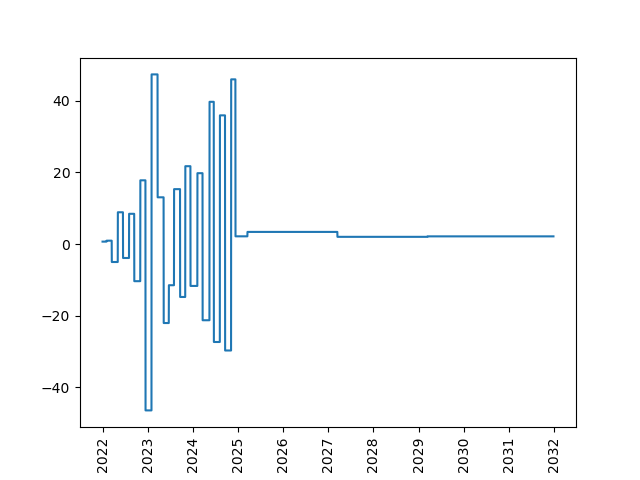

In [25]:
fig, ax = plt.subplots()
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*10)]
z = [ini_s_cv.rate(date, days=1).real for date in x]
ax.plot(x, z)
# ax.set_xlim(datetime(2023,1,1),datetime(2024,9,30))
# ax.set_ylim(2.3,2.75)
plt.xticks(rotation=90)
plt.show()

The problem with this curve is that it is underspecified in terms of market instruments for all the numbers of nodes it contains. We seek to restrict the curvature.

## Curvature constraints in the log-linear section

In [41]:
mpc_1 = Swap(datetime(2022, 2, 3), 1, 1, 1, days=True)
mpc_2 = Swap(datetime(2022, 3, 17), 1, 1, 1, days=True)
mpc_3 = Swap(datetime(2022, 5, 5), 1, 1, 1, days=True)
mpc_4 = Swap(datetime(2022, 6, 16), 1, 1, 1, days=True)
mpc_5 = Swap(datetime(2022, 8, 4), 1, 1, 1, days=True)
mpc_6 = Swap(datetime(2022, 9, 15), 1, 1, 1, days=True)
mpc_7 = Swap(datetime(2022, 11, 3), 1, 1, 1, days=True)
mpc_8 = Swap(datetime(2022, 12, 15), 1, 1, 1, days=True)
mpc_9 = Swap(datetime(2023, 2, 2), 1, 1, 1, days=True)
mpc_10 = Swap(datetime(2023, 3, 23), 1, 1, 1, days=True)
mpc_11 = Swap(datetime(2023, 5, 11), 1, 1, 1, days=True)
mpc_12 = Swap(datetime(2023, 6, 22), 1, 1, 1, days=True)
mpc_13 = Swap(datetime(2023, 8, 3), 1, 1, 1, days=True)
mpc_14 = Swap(datetime(2023, 9, 21), 1, 1, 1, days=True)
mpc_15 = Swap(datetime(2023, 11, 2), 1, 1, 1, days=True)
mpc_16 = Swap(datetime(2023, 12, 14), 1, 1, 1, days=True)
mpc_17 = Swap(datetime(2024, 2, 8), 1, 1, 1, days=True)
mpc_18 = Swap(datetime(2024, 3, 21), 1, 1, 1, days=True)
mpc_19 = Swap(datetime(2024, 5, 16), 1, 1, 1, days=True)
mpc_20 = Swap(datetime(2024, 6, 20), 1, 1, 1, days=True)
mpc_21 = Swap(datetime(2024, 8, 8), 1, 1, 1, days=True)
mpc_22 = Swap(datetime(2024, 9, 19), 1, 1, 1, days=True)
mpc_23 = Swap(datetime(2024, 11, 7), 1, 1, 1, days=True)
mpc_24 = Swap(datetime(2024, 12, 12), 1, 1, 1, days=True)
mpc_25 = Swap(datetime(2025, 3, 20), 1, 1, 1, days=True)

curvature_conds = {
SwapSpread(SwapSpread(mpc_1, mpc_2), SwapSpread(mpc_2, mpc_3)): 0,
SwapSpread(SwapSpread(mpc_2, mpc_3), SwapSpread(mpc_3, mpc_4)): 0,
SwapSpread(SwapSpread(mpc_3, mpc_4), SwapSpread(mpc_4, mpc_5)): 0,
SwapSpread(SwapSpread(mpc_4, mpc_5), SwapSpread(mpc_5, mpc_6)): 0,
SwapSpread(SwapSpread(mpc_5, mpc_6), SwapSpread(mpc_6, mpc_7)): 0,
SwapSpread(SwapSpread(mpc_6, mpc_7), SwapSpread(mpc_7, mpc_8)): 0,
SwapSpread(SwapSpread(mpc_7, mpc_8), SwapSpread(mpc_8, mpc_9)): 0,
SwapSpread(SwapSpread(mpc_8, mpc_9), SwapSpread(mpc_9, mpc_10)): 0,
SwapSpread(SwapSpread(mpc_9, mpc_10), SwapSpread(mpc_10, mpc_11)): 0,
SwapSpread(SwapSpread(mpc_10, mpc_11), SwapSpread(mpc_11, mpc_12)): 0,
SwapSpread(SwapSpread(mpc_11, mpc_12), SwapSpread(mpc_12, mpc_13)): 0,
SwapSpread(SwapSpread(mpc_12, mpc_13), SwapSpread(mpc_13, mpc_14)): 0,
SwapSpread(SwapSpread(mpc_13, mpc_14), SwapSpread(mpc_14, mpc_15)): 0,
SwapSpread(SwapSpread(mpc_14, mpc_15), SwapSpread(mpc_15, mpc_16)): 0,
SwapSpread(SwapSpread(mpc_15, mpc_16), SwapSpread(mpc_16, mpc_17)): 0,
SwapSpread(SwapSpread(mpc_16, mpc_17), SwapSpread(mpc_17, mpc_18)): 0,
SwapSpread(SwapSpread(mpc_17, mpc_18), SwapSpread(mpc_18, mpc_19)): 0,
SwapSpread(SwapSpread(mpc_18, mpc_19), SwapSpread(mpc_19, mpc_20)): 0,
SwapSpread(SwapSpread(mpc_19, mpc_20), SwapSpread(mpc_20, mpc_21)): 0,
SwapSpread(SwapSpread(mpc_20, mpc_21), SwapSpread(mpc_21, mpc_22)): 0,
SwapSpread(SwapSpread(mpc_21, mpc_22), SwapSpread(mpc_22, mpc_23)): 0,
SwapSpread(SwapSpread(mpc_22, mpc_23), SwapSpread(mpc_23, mpc_24)): 0,
SwapSpread(SwapSpread(mpc_23, mpc_24), SwapSpread(mpc_24, mpc_25)): 0,
}
 
swaps = {**ini_swaps, **curvature_conds}
s_cv = SolvedCurve(
    nodes=nodes_dual, interpolation="log_linear",
    swaps=list(swaps.keys()), obj_rates=list(swaps.values()),
    algorithm="levenberg_marquardt", w = [1]*len(ini_swaps) + [0.0001]*len(curvature_conds)
)
print(s_cv.iterate())

tolerance reached (levenberg_marquardt) after 13 iterations, func: 1.5300607203448737e-06


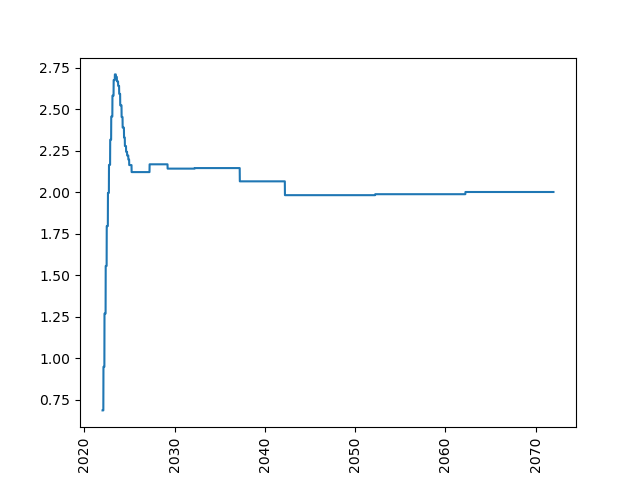

In [43]:
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*50)]
z = [s_cv.rate(date, days=1).real for date in x]
fig, ax = plt.subplots()
ax.plot(x, z)
#ax.set_xlim(datetime(2022,1,1),datetime(2022,9,30))
plt.xticks(rotation=90)
plt.show()

## Turns

Next we add nodes according to the material in the text

In [47]:
nodes_short = {
    datetime(2022, 1, 1): 1.00,  # today's DF
    datetime(2022, 2, 3): 1.00,  # defined MPC dates..
    datetime(2022, 3, 17): 1.00,
    datetime(2022, 3, 31): 1.00, # turn1
    datetime(2022, 4, 1): 1.00,  # turn1
    datetime(2022, 5, 5): 1.00,
    datetime(2022, 6, 16): 1.00,
    datetime(2022, 6, 30): 1.00, # turn2
    datetime(2022, 7, 1): 1.00,  # turn2
    datetime(2022, 8, 4): 1.00,
    datetime(2022, 9, 15): 1.00,
    datetime(2022, 9, 30): 1.00,  # turn3
    datetime(2022, 10, 1): 1.00,  # turn3
    datetime(2022, 11, 3): 1.00,
    datetime(2022, 12, 15): 1.00,
    datetime(2022, 12, 31): 1.00, # turn4
    datetime(2023, 1, 1): 1.00,  # turn4
    datetime(2023, 2, 2): 1.00,  # provisional MPC dates..
    datetime(2023, 3, 23): 1.00,
    datetime(2023, 3, 31): 1.00, # turn5
    datetime(2023, 4, 1): 1.00,  # turn5
    datetime(2023, 5, 11): 1.00,
    datetime(2023, 6, 22): 1.00,
    datetime(2023, 6, 30): 1.00,  # turn6
    datetime(2023, 7, 1): 1.00,  # turn6
    datetime(2023, 8, 3): 1.00,
    datetime(2023, 9, 21): 1.00,
    datetime(2023, 9, 30): 1.00,  # turn7
    datetime(2023, 10, 1): 1.00,  # turn7
    datetime(2023, 11, 2): 1.00,
    datetime(2023, 12, 14): 1.00,
    datetime(2023, 12, 31): 1.00,  # turn8
    datetime(2024, 1, 1): 1.00,  # turn8
    datetime(2024, 2, 8): 1.00,  # estimated MPC dates..
    datetime(2024, 3, 21): 1.00,
    datetime(2024, 5, 16): 1.00,
    datetime(2024, 6, 20): 1.00,
    datetime(2024, 8, 8): 1.00,
    datetime(2024, 9, 19): 1.00,
    datetime(2024, 11, 7): 1.00,
    datetime(2024, 12, 12): 1.00
}
nodes_long = {
    datetime(2025, 3, 19): 1.00,  # long term tenors..
    datetime(2027, 3, 17): 1.00,
    datetime(2029, 3, 15): 1.00,
    datetime(2032, 3, 15): 1.00,
    datetime(2037, 3, 15): 1.00,
    datetime(2042, 3, 15): 1.00,
    datetime(2052, 3, 15): 1.00,
    datetime(2062, 3, 15): 1.00,
    datetime(2072, 3, 15): 1.00,
}
nodes = {**nodes_short, **nodes_long}
nodes_dual = {k: Dual(v, {f"v{i}": 1}) for i, (k,v) in enumerate(nodes.items())}

turns = {
    SwapSpread(
        Swap(datetime(2022, 3, 30), 1, 1, 1, days=True),
        Swap(datetime(2022, 3, 31), 1, 1, 1, days=True),
    ): -0.03,
    SwapSpread(
        Swap(datetime(2022, 3, 31), 1, 1, 1, days=True),
        Swap(datetime(2022, 4, 1), 1, 1, 1, days=True),
    ): 0.03,  # turn 1
    SwapSpread(
        Swap(datetime(2022, 6, 29), 1, 1, 1, days=True),
        Swap(datetime(2022, 6, 30), 1, 1, 1, days=True),
    ): -0.05,
    SwapSpread(
        Swap(datetime(2022, 6, 30), 1, 1, 1, days=True),
        Swap(datetime(2022, 7, 1), 1, 1, 1, days=True),
    ): 0.05,  # turn 2
    SwapSpread(
        Swap(datetime(2022, 9, 29), 1, 1, 1, days=True),
        Swap(datetime(2022, 9, 30), 1, 1, 1, days=True),
    ): -0.03,
    SwapSpread(
        Swap(datetime(2022, 9, 30), 1, 1, 1, days=True),
        Swap(datetime(2022, 10, 1), 1, 1, 1, days=True),
    ): 0.03,  # turn 3
    SwapSpread(
        Swap(datetime(2022, 12, 30), 1, 1, 1, days=True),
        Swap(datetime(2022, 12, 31), 1, 1, 1, days=True),
    ): -0.05,
    SwapSpread(
        Swap(datetime(2022, 12, 31), 1, 1, 1, days=True),
        Swap(datetime(2023, 1, 1), 1, 1, 1, days=True),
    ): 0.05,  # turn 4
    SwapSpread(
        Swap(datetime(2023, 3, 30), 1, 1, 1, days=True),
        Swap(datetime(2023, 3, 31), 1, 1, 1, days=True),
    ): -0.03,
    SwapSpread(
        Swap(datetime(2023, 3, 31), 1, 1, 1, days=True),
        Swap(datetime(2023, 4, 1), 1, 1, 1, days=True),
    ): 0.03,  # turn 5
    SwapSpread(
        Swap(datetime(2023, 6, 29), 1, 1, 1, days=True),
        Swap(datetime(2023, 6, 30), 1, 1, 1, days=True),
    ): -0.05,
    SwapSpread(
        Swap(datetime(2023, 6, 30), 1, 1, 1, days=True),
        Swap(datetime(2023, 7, 1), 1, 1, 1, days=True),
    ): 0.05,  # turn 6
    SwapSpread(
        Swap(datetime(2023, 9, 29), 1, 1, 1, days=True),
        Swap(datetime(2023, 9, 30), 1, 1, 1, days=True),
    ): -0.03,
    SwapSpread(
        Swap(datetime(2023, 9, 30), 1, 1, 1, days=True),
        Swap(datetime(2023, 10, 1), 1, 1, 1, days=True),
    ): 0.03,  # turn 7
    SwapSpread(
        Swap(datetime(2023, 12, 30), 1, 1, 1, days=True),
        Swap(datetime(2023, 12, 31), 1, 1, 1, days=True),
    ): -0.05,
    SwapSpread(
        Swap(datetime(2023, 12, 31), 1, 1, 1, days=True),
        Swap(datetime(2024, 1, 1), 1, 1, 1, days=True),
    ): 0.05,  # turn 8
}

swaps = {**ini_swaps, **turns, **curvature_conds}
weights = [1]*len(ini_swaps) + [1]*len(turns) + [0.0001]*len(curvature_conds)
s_cv_turns = SolvedCurve(
    nodes=nodes_dual, interpolation="log_linear",
    swaps=list(swaps.keys()), obj_rates=list(swaps.values()),
    algorithm="levenberg_marquardt", 
    w=weights,
)
print(s_cv_turns.iterate())

tolerance reached (levenberg_marquardt) after 13 iterations, func: 1.527282519405886e-06


In [48]:
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*5)]
y = [s_cv_turns.rate(date, days=1).real for date in x]

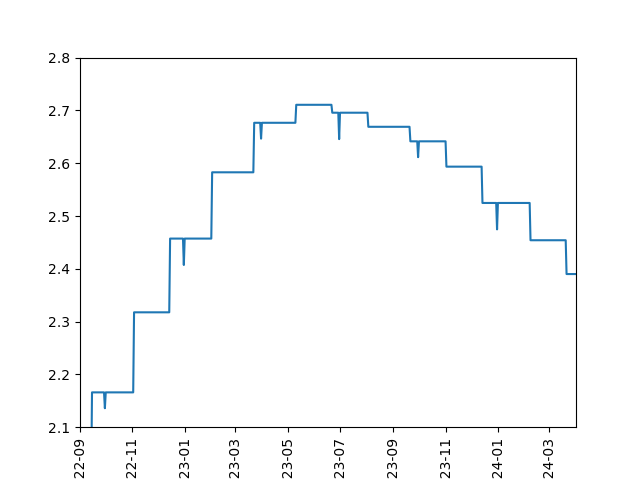

In [49]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(datetime(2022,9,1),datetime(2024,4,1))
ax.set_ylim(2.1, 2.8)
plt.xticks(rotation=90)
plt.show()

## Second layer

Adding in longer term granularity to the log-cubic spline section

In [50]:
t_layer_1 = [
     datetime(2025, 3, 19), datetime(2025, 3, 19), datetime(2025, 3, 19), datetime(2025, 3, 19),
     datetime(2027, 3, 15),
     datetime(2029, 3, 15),
     datetime(2032, 3, 15),
     datetime(2037, 3, 15),
     datetime(2042, 3, 15),
     datetime(2052, 3, 15),
     datetime(2062, 3, 15),
     datetime(2072, 3, 15), datetime(2072, 3, 15), datetime(2072, 3, 15), datetime(2072, 3, 15),
    ]

adv_cv_1 = AdvancedCurve(
    nodes=nodes_dual, interpolation="log_linear", 
    swaps=list(swaps.keys()), obj_rates=list(swaps.values()), t=t_layer_1,
    algorithm="levenberg_marquardt", 
    w=weights,
)
print(adv_cv_1.iterate())


basic solve:  tolerance reached (levenberg_marquardt) after 13 iterations, func: 1.527282519405886e-06
tolerance reached (gauss_newton) after 2 iterations, func: 1.5545839576543324e-06


In [51]:
len(t_layer_1)

15

In [27]:

skews_layer_2 = {
    Swap(datetime(2022, 1, 1), 12*4, 12, 12): -0.0015,
    Swap(datetime(2022, 1, 1), 12*6, 12, 12): +0.0015,
    Swap(datetime(2022, 1, 1), 12*8, 12, 12): -0.0005,
    Swap(datetime(2022, 1, 1), 12*9, 12, 12): -0.0005,
    Swap(datetime(2022, 1, 1), 12*12, 12, 12): -0.001,
    Swap(datetime(2022, 1, 1), 12*25, 12, 12): 0,
    Swap(datetime(2022, 1, 1), 12*35, 12, 12): -0.0005,
    Swap(datetime(2022, 1, 1), 12*45, 12, 12): 0,
}

t_layer_2 = [
     datetime(2025, 3, 19), datetime(2025, 3, 19), datetime(2025, 3, 19), datetime(2025, 3, 19),
     datetime(2026, 3, 15),  # 4y
     datetime(2027, 3, 15),
     datetime(2028, 3, 15),  # 6y
     datetime(2029, 3, 15), 
     datetime(2030, 3, 15),  # 8y
     datetime(2031, 3, 15),  # 9y
     datetime(2032, 3, 15),
     datetime(2034, 3, 15),  # 12y
     datetime(2037, 3, 15),
     datetime(2042, 3, 15),
     datetime(2047, 3, 15),  # 25y
     datetime(2052, 3, 15),
     datetime(2057, 3, 15),  # 35y
     datetime(2062, 3, 15),
     datetime(2067, 3, 15),  # 45y
     datetime(2072, 3, 15), datetime(2072, 3, 15), datetime(2072, 3, 15), datetime(2072, 3, 15),
    ]

swaps_layer_2 = {
    swap: swap.rate(adv_cv_1).real + skew for (swap, skew) in skews_layer_2.items()
}

nodes_2 = {**nodes_short, **{
    datetime(2025, 3, 19): 1.00,  # long term tenors..
    datetime(2026, 3, 17): 1.00,
    datetime(2027, 3, 17): 1.00,
    datetime(2028, 3, 15): 1.00,
    datetime(2029, 3, 17): 1.00,
    datetime(2030, 3, 17): 1.00,
    datetime(2031, 3, 17): 1.00,
    datetime(2032, 3, 15): 1.00,
    datetime(2034, 3, 15): 1.00,
    datetime(2037, 3, 15): 1.00,
    datetime(2042, 3, 15): 1.00,
    datetime(2047, 3, 15): 1.00,
    datetime(2052, 3, 15): 1.00,
    datetime(2057, 3, 15): 1.00,
    datetime(2062, 3, 15): 1.00,
    datetime(2067, 3, 15): 1.00,
    datetime(2072, 3, 15): 1.00,
}}
nodes_dual_2 = {k: Dual(v, {f"v{i}": 1}) for i, (k,v) in enumerate(nodes_2.items())}

swaps_2 = {**ini_swaps, **swaps_layer_2, **turns, **curvature_conds}
weights_2 = [1]*(len(ini_swaps)+len(swaps_layer_2)+len(turns)) + [0.0001]*len(curvature_conds)
adv_cv_2 = AdvancedCurve(
    nodes=nodes_dual_2, interpolation="log_linear", 
    swaps=list(swaps_2.keys()), obj_rates=list(swaps_2.values()), t=t_layer_2,
    algorithm="levenberg_marquardt", 
    w=weights_2
)
print(adv_cv_2.iterate())

basic solve:  tolerance reached (levenberg_marquardt) after 13 iterations, func: 1.527282519405886e-06
tolerance reached (gauss_newton) after 2 iterations, func: 1.5545839576543324e-06
basic solve:  tolerance reached (levenberg_marquardt) after 13 iterations, func: 1.5784941697807957e-06
tolerance reached (gauss_newton) after 2 iterations, func: 1.6006584502208973e-06


In [30]:
x = [datetime(2024,6,15) + i * timedelta(days=1) for i in range(365*7)]
y = [adv_cv_1.rate(date, days=1).real for date in x]
z = [adv_cv_2.rate(date, days=1).real for date in x]
w = [s_cv.rate(date, days=1).real for date in x]

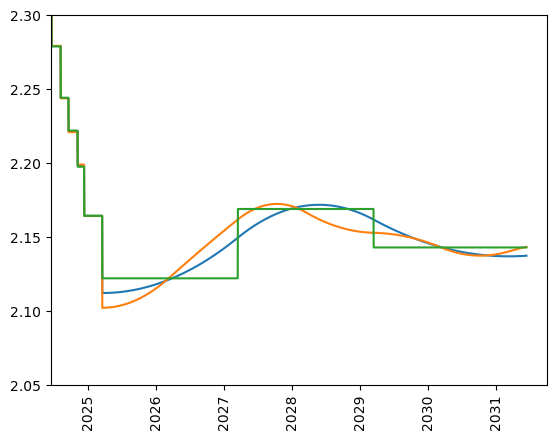

In [31]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, z)
ax.plot(x, w)
ax.set_xlim(datetime(2024,6,15),datetime(2031,9,30))
ax.set_ylim(2.05,2.30)
plt.xticks(rotation=90)
plt.show()

In [39]:
x = [datetime(2022,1,1) + i * timedelta(days=1) for i in range(365*30)]
y = [adv_cv_1.rate(datetime(2022,1,1), days=i+1).real for i in range(365*30)]


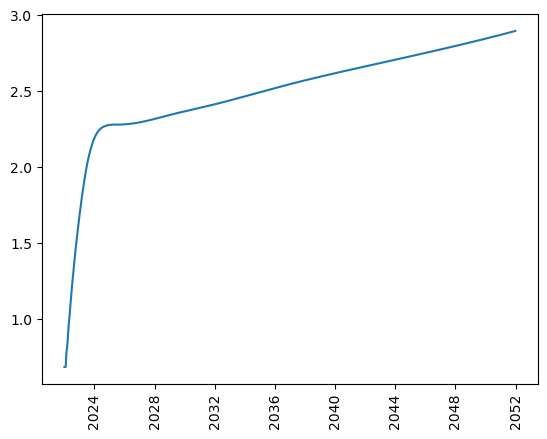

In [43]:
fig, ax = plt.subplots()
ax.plot(x, y)
#ax.set_xlim(datetime(2024,6,15),datetime(2031,9,30))
#ax.set_xlim(datetime(2022,1,1),datetime(2030,9,30))
#ax.set_ylim(2.05,2.30)
plt.xticks(rotation=90)
plt.show()

## Risk

In [ ]:
test_swap = Swap(datetime(2022,3,31), 1, 1, 1, days=True, notional=10e9) # Mar 22 Turn
# test_swap = Swap(datetime(2022, 9, 16), 3, 3, 3) # Sep IMM
# test_swap = Swap(datetime(2022, 5, 5), 42, 42, 42, days=True) # May MPC
risk = test_swap.risk(adv_cv_2)

In [ ]:
index = ["d1", "d2", "imm1", "imm2", "imm3", "imm4", "imm5", "imm6", "imm7",
         "imm8", "imm9", "imm10", "imm11", "imm12", "5y", "7y", "10y", "15y", "20y",
         "30y", "40y", "50y", "4y", "6y", "8y", "9y", "12y", "25y", "35y", "45y"]
for i in range(8):
    index += [f"turn{i+1}_left",  f"turn{i+1}_right"]
index += [f"curv{i+1}" for i in range(23)] 
pd.DataFrame({"swap": risk[:, 0]}, index=index).style